<a href="https://colab.research.google.com/github/SaniyaBubere/Bank-Marketing/blob/main/Multisales_Sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

#Autoregressive (AR):

This looks at the relationship between a data point and its past values. It captures the idea that what happens now is related to what happened in the past.


#Integrated (I):

This part involves differencing the time series to make it more predictable. It represents how many times you need to subtract the previous value from the current one to make the series stationary (having constant statistical properties).

#Moving Average (MA):

This considers the relationship between a data point and a residual error from a moving average model applied to past values. It helps account for random fluctuations in the data.

In [39]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df=pd.read_excel('/content/drive/MyDrive/Multisales.xlsx')

In [42]:
df.head()

,Year,Month,Sales
0,Totals,NaN,1.783148e+06
1,2011,1.0,1.734950e+03
2,2011,2.0,7.239520e+02
3,2011,3.0,4.388953e+03
4,2011,4.0,1.852150e+03


In [43]:
df.tail()

,Year,Month,Sales
41,2014,5.0,66884.5915
42,2014,6.0,52816.2050
43,2014,7.0,40445.7805
44,2014,8.0,23313.7605
45,2014,9.0,83372.2778


In [44]:
# Drop the row with index 0
df = df.drop(0)

In [45]:
df.head()

,Year,Month,Sales
1,2011,1.0,1734.9500
2,2011,2.0,723.9520
3,2011,3.0,4388.9535
4,2011,4.0,1852.1500
5,2011,5.0,4539.7840


In [46]:
# Convert the 'Month' column from float to int
df['Month'] = df['Month'].astype(int)

In [47]:
df['year']="01-"+df['Month'].astype(str)+"-"+df["Year"].astype(str)

In [48]:
df['year']

1      01-1-2011
2      01-2-2011
3      01-3-2011
4      01-4-2011
5      01-5-2011
6      01-6-2011
7      01-7-2011
8      01-8-2011
9      01-9-2011
10    01-10-2011
11    01-11-2011
12    01-12-2011
13     01-1-2012
14     01-2-2012
15     01-3-2012
16     01-4-2012
17     01-5-2012
18     01-6-2012
19     01-7-2012
20     01-8-2012
21     01-9-2012
22    01-10-2012
23    01-11-2012
24    01-12-2012
25     01-1-2013
26     01-2-2013
27     01-3-2013
28     01-4-2013
29     01-5-2013
30     01-6-2013
31     01-7-2013
32     01-8-2013
33     01-9-2013
34    01-10-2013
35    01-11-2013
36    01-12-2013
37     01-1-2014
38     01-2-2014
39     01-3-2014
40     01-4-2014
41     01-5-2014
42     01-6-2014
43     01-7-2014
44     01-8-2014
45     01-9-2014
Name: year, dtype: object

In [49]:
df.head()

,Year,Month,Sales,year
1,2011,1,1734.9500,01-1-2011
2,2011,2,723.9520,01-2-2011
3,2011,3,4388.9535,01-3-2011
4,2011,4,1852.1500,01-4-2011
5,2011,5,4539.7840,01-5-2011


In [51]:
df.set_index('year',inplace=True)

In [52]:
import seaborn as sns

In [57]:
plt.figure(figsize=(10, 16))

<Figure size 1000x1600 with 0 Axes>

<Figure size 1000x1600 with 0 Axes>

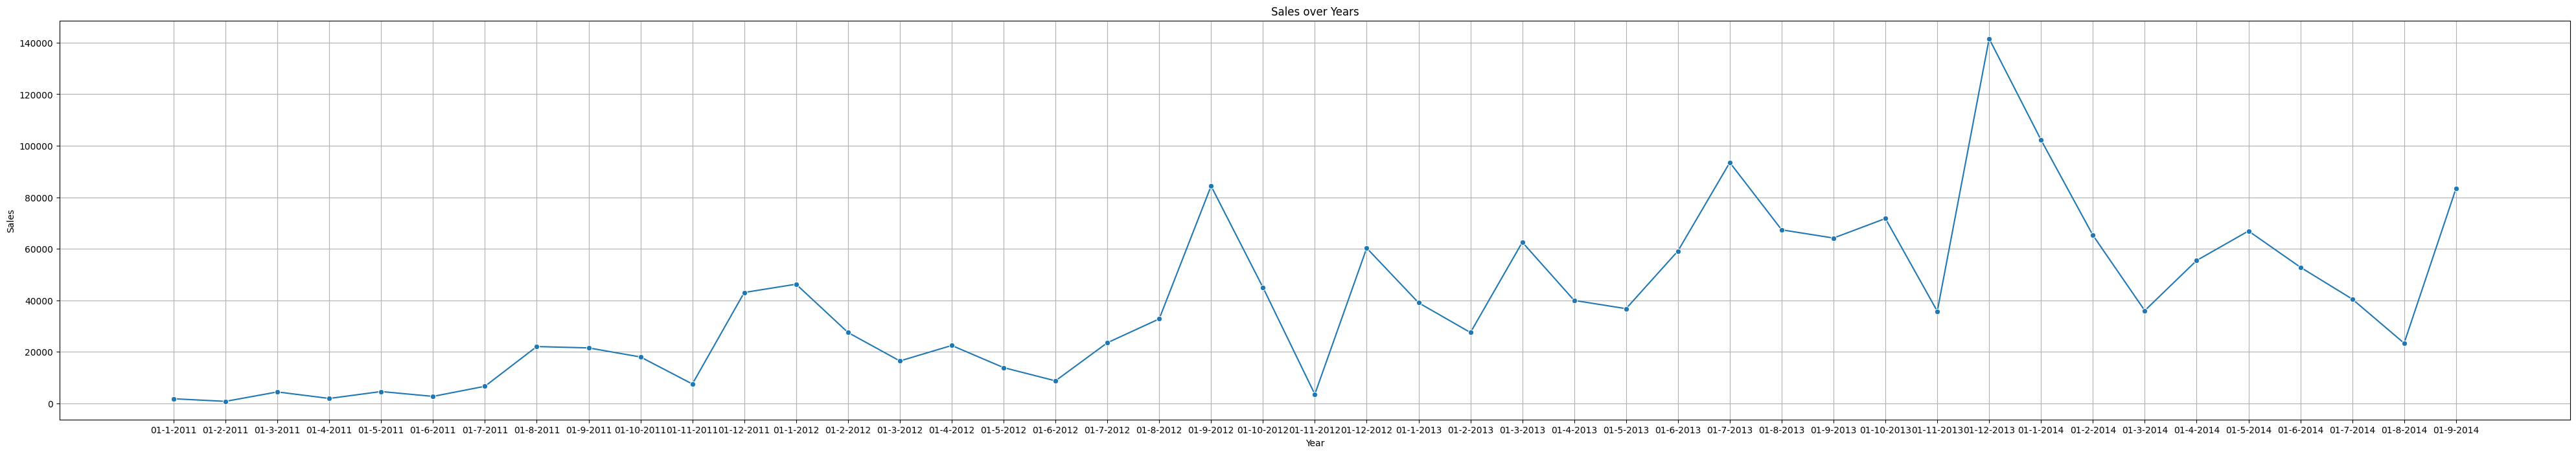

In [66]:
plt.figure(figsize=(50, 8))
sns.lineplot(data=df, x=df.index, y='Sales', marker='o')

plt.title('Sales over Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

<Axes: xlabel='year', ylabel='Sales'>

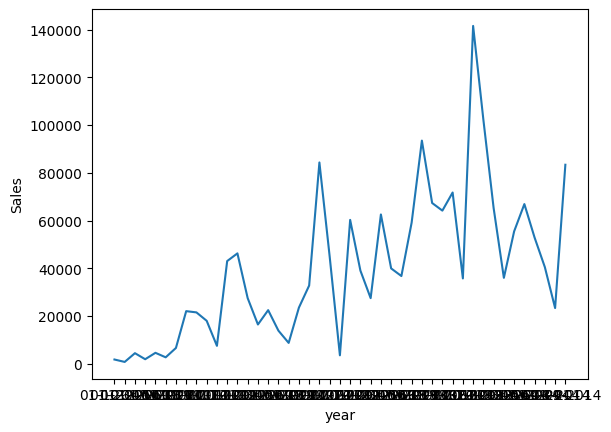

In [56]:
# sns.lineplot(data=df,x=df.index,y=df.Sales)

In [67]:
# Drop the 'Year' and 'Month' columns
df = df.drop(columns=['Year', 'Month'])

# Display the DataFrame after dropping the columns
print("\nDataFrame after dropping 'Year' and 'Month' columns:")
print(df)


DataFrame after dropping 'Year' and 'Month' columns:
                  Sales
year                   
01-1-2011     1734.9500
01-2-2011      723.9520
01-3-2011     4388.9535
01-4-2011     1852.1500
01-5-2011     4539.7840
01-6-2011     2653.8250
01-7-2011     6576.9900
01-8-2011    22004.8640
01-9-2011    21483.9050
01-10-2011   17958.8445
01-11-2011    7464.5760
01-12-2011   43000.0610
01-1-2012    46222.4220
01-2-2012    27467.8820
01-3-2012    16411.9660
01-4-2012    22424.4725
01-5-2012    13835.2020
01-6-2012     8693.0020
01-7-2012    23487.7770
01-8-2012    32744.5390
01-9-2012    84332.3666
01-10-2012   44957.7460
01-11-2012    3494.6200
01-12-2012   60255.0370
01-1-2013    39009.1295
01-2-2013    27457.0010
01-3-2013    62527.2720
01-4-2013    39920.9020
01-5-2013    36723.9095
01-6-2013    59108.9460
01-7-2013    93485.7866
01-8-2013    67335.1425
01-9-2013    64144.4265
01-10-2013   71735.8805
01-11-2013   35716.9810
01-12-2013  141561.5996
01-1-2014   102252.7630
01-2-2014 

In [14]:
df.tail()

,Sales,year
41,66884.5915,01-5-2014
42,52816.2050,01-6-2014
43,40445.7805,01-7-2014
44,23313.7605,01-8-2014
45,83372.2778,01-9-2014


In [15]:

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Convert 'year' column to datetime format
df['year'] = pd.to_datetime(df['year'], format='%m-%d-%Y')

# Reorder and select columns
df = df[['year', 'Sales']]

# Display the DataFrame in the desired format
print("\nDataFrame with 'Year' and 'Sales' columns:")
print(df)

Original DataFrame:
          Sales        year
1     1734.9500   01-1-2011
2      723.9520   01-2-2011
3     4388.9535   01-3-2011
4     1852.1500   01-4-2011
5     4539.7840   01-5-2011
6     2653.8250   01-6-2011
7     6576.9900   01-7-2011
8    22004.8640   01-8-2011
9    21483.9050   01-9-2011
10   17958.8445  01-10-2011
11    7464.5760  01-11-2011
12   43000.0610  01-12-2011
13   46222.4220   01-1-2012
14   27467.8820   01-2-2012
15   16411.9660   01-3-2012
16   22424.4725   01-4-2012
17   13835.2020   01-5-2012
18    8693.0020   01-6-2012
19   23487.7770   01-7-2012
20   32744.5390   01-8-2012
21   84332.3666   01-9-2012
22   44957.7460  01-10-2012
23    3494.6200  01-11-2012
24   60255.0370  01-12-2012
25   39009.1295   01-1-2013
26   27457.0010   01-2-2013
27   62527.2720   01-3-2013
28   39920.9020   01-4-2013
29   36723.9095   01-5-2013
30   59108.9460   01-6-2013
31   93485.7866   01-7-2013
32   67335.1425   01-8-2013
33   64144.4265   01-9-2013
34   71735.8805  01-10-2013


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 01-1-2011 to 01-9-2014
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   45 non-null     float64
dtypes: float64(1)
memory usage: 1.8+ KB


In [70]:
df.head()

,Sales
year,
01-1-2011,1734.9500
01-2-2011,723.9520
01-3-2011,4388.9535
01-4-2011,1852.1500
01-5-2011,4539.7840


In [71]:
df.tail()

,Sales
year,
01-5-2014,66884.5915
01-6-2014,52816.2050
01-7-2014,40445.7805
01-8-2014,23313.7605
01-9-2014,83372.2778


In [72]:
len(df)

45

<Axes: xlabel='year'>

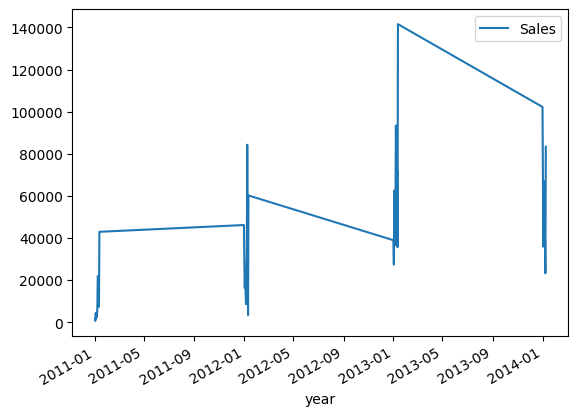

In [22]:
# df.plot()

In [81]:
df.describe()

,Sales
count,45.000000
mean,39625.504458
std,31218.869089
min,723.952000
25%,16411.966000
50%,35966.094500
75%,60255.037000
max,141561.599600


## Step 2: Visualize the Data

In [76]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [77]:
test_result=adfuller(df['Sales'])

#Stationary Time Series:

A time series is considered stationary when its statistical properties do not change over time

#Non-Stationary Time Series:

A time series is considered non-stationary when one or more of its statistical properties change over time.

#Example Of Non-Stationary

Trend: There is a long-term movement or tendency in the data, either upward (increasing trend), downward (decreasing trend), or nonlinear.


Seasonality: Regular, repeating patterns that occur at known intervals (e.g., daily, weekly, or yearly patterns).

In [78]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    # Interpret the results based on the p-value
    if result[1] <= 0.05:
      print("Reject the null hypothesis. The data is stationary (no unit root).")
    else:
      print("Fail to reject the null hypothesis. The time series is non-stationary (has a unit root).")


In [79]:
adfuller_test(df['Sales'])

ADF Test Statistic : -3.4672630247509946
p-value : 0.008868746404319951
#Lags Used : 0
Number of Observations Used : 44
Reject the null hypothesis. The data is stationary (no unit root).


#Augmented Dickey-Fuller Test = ADF

The ADF test statistic is a negative number. It becomes more negative as the data becomes more stationary. In general, a more negative value indicates stronger evidence against the null hypothesis of a unit root (non-stationarity).

#p-value

If the p-value is less than or equal to the significance level, you reject the null hypothesis. In the context of the ADF test, rejecting the null hypothesis suggests that the data is stationary.

If the p-value is greater than the significance level, you do not reject the null hypothesis, indicating that the data is non-stationary.

##Lags Used

This is the number of lags (or time periods) used in the regression when estimating the unit root test. It provides information about the amount of past data considered in the test.

Lags are included to account for autocorrelation in the time series data. Autocorrelation refers to the correlation between a current observation and its past observations.

#Number of Observations Used

This is the number of observations used in the ADF regression. It represents the effective sample size.

ADF test results are more reliable with a larger sample size. A larger sample size provides more information and can lead to more accurate statistical inference.

## Differencing

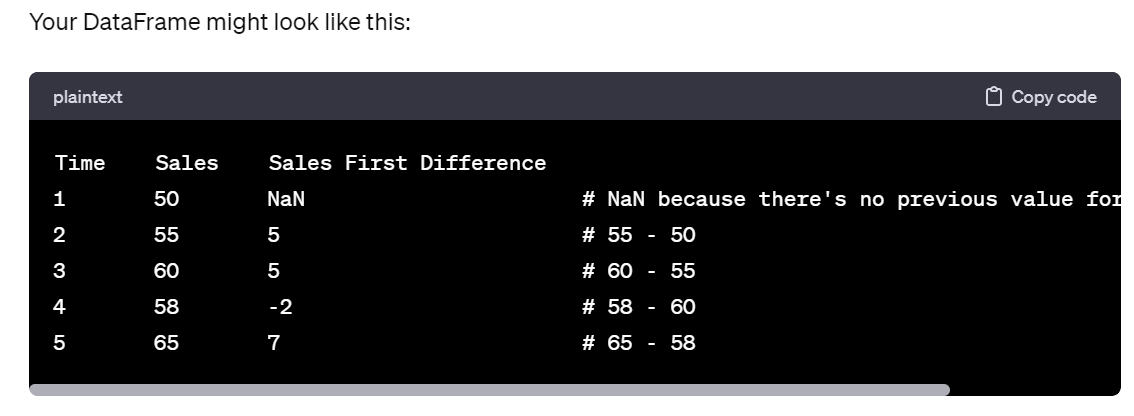

In [80]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

# .shift(1):

The .shift(1) function is applied to the 'Sales' column. It shifts the values down by 1 position. This means each value in the new series (df['Sales'].shift(1)) is the previous value of 'Sales'.

In [81]:
df['Sales'].shift(1)

year
01-1-2011             NaN
01-2-2011       1734.9500
01-3-2011        723.9520
01-4-2011       4388.9535
01-5-2011       1852.1500
01-6-2011       4539.7840
01-7-2011       2653.8250
01-8-2011       6576.9900
01-9-2011      22004.8640
01-10-2011     21483.9050
01-11-2011     17958.8445
01-12-2011      7464.5760
01-1-2012      43000.0610
01-2-2012      46222.4220
01-3-2012      27467.8820
01-4-2012      16411.9660
01-5-2012      22424.4725
01-6-2012      13835.2020
01-7-2012       8693.0020
01-8-2012      23487.7770
01-9-2012      32744.5390
01-10-2012     84332.3666
01-11-2012     44957.7460
01-12-2012      3494.6200
01-1-2013      60255.0370
01-2-2013      39009.1295
01-3-2013      27457.0010
01-4-2013      62527.2720
01-5-2013      39920.9020
01-6-2013      36723.9095
01-7-2013      59108.9460
01-8-2013      93485.7866
01-9-2013      67335.1425
01-10-2013     64144.4265
01-11-2013     71735.8805
01-12-2013     35716.9810
01-1-2014     141561.5996
01-2-2014     102252.7630
01-3-20

In [82]:
df.head()

,Sales,Sales First Difference
year,,
01-1-2011,1734.9500,NaN
01-2-2011,723.9520,-1010.9980
01-3-2011,4388.9535,3665.0015
01-4-2011,1852.1500,-2536.8035
01-5-2011,4539.7840,2687.6340


In [83]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

#NaN Entries:

The first 12 entries have NaN values in the 'Seasonal First Difference' column because there are no previous values for the corresponding months in the previous year.

In [84]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
year,,,
01-1-2011,1734.9500,NaN,NaN
01-2-2011,723.9520,-1010.9980,NaN
01-3-2011,4388.9535,3665.0015,NaN
01-4-2011,1852.1500,-2536.8035,NaN
01-5-2011,4539.7840,2687.6340,NaN
01-6-2011,2653.8250,-1885.9590,NaN
01-7-2011,6576.9900,3923.1650,NaN
01-8-2011,22004.8640,15427.8740,NaN
01-9-2011,21483.9050,-520.9590,NaN


For example, the value in 'Seasonal First Difference' for January 1965 is calculated as: 2541.0 (Sales for Jan 1965) - 2815.0 (Sales for Jan 1964) = -274.0.


Similarly, the value for February 1965 is: 2475.0 (Sales for Feb 1965) - 2672.0 (Sales for Feb 1964) = -197.0

In [85]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -4.000518664186385
p-value : 0.0014077978090045757
#Lags Used : 1
Number of Observations Used : 31
Reject the null hypothesis. The data is stationary (no unit root).


Now the data is Stationary

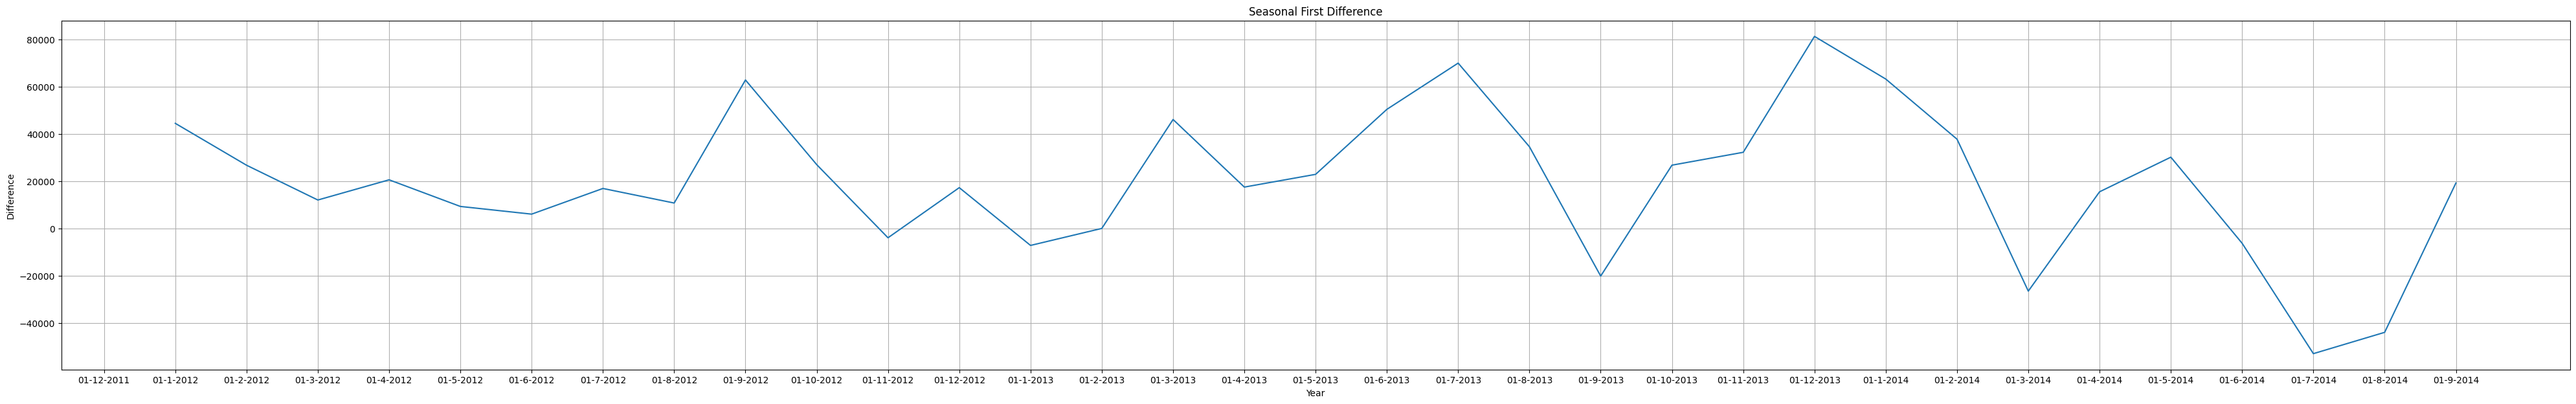

In [88]:
plt.figure(figsize=(50,7))
plt.plot(df['Seasonal First Difference'])
plt.title('Seasonal First Difference')
plt.xlabel('Year')
plt.ylabel('Difference')
plt.grid(True)
plt.show()

## Auto Regressive Model

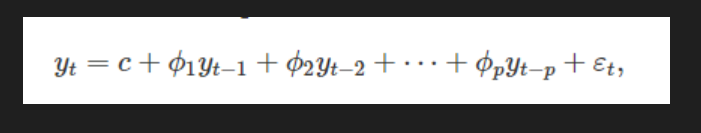

t-1 , t-2 this are lags

suppose you want to predict todays data so how many previous data will have to consider & that can be done by using only autocorrelation plot

Autocorrelation plots are useful for understanding the correlation between a time series and its lagged values. They help identify the number of lags that might be relevant when predicting today's data. Let's break down how you can use an autocorrelation plot to determine the number of lags for prediction

In [89]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

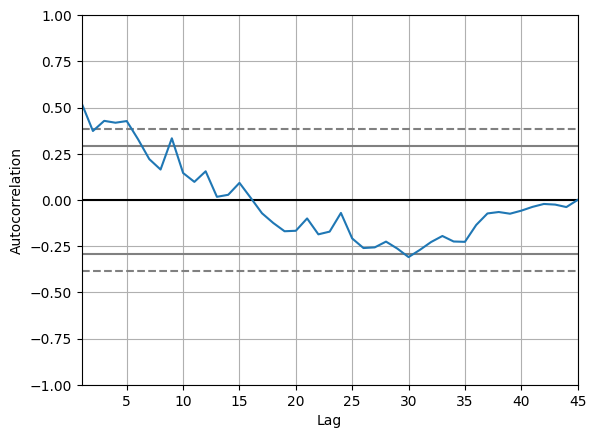

In [90]:
 #from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the ##PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

#AutoRegressive (AR) Model Identification:
PACF for AR Model:

The identification of an AR model is often best done using the PACF.
The PACF helps determine the order of the AR model.
The theoretical PACF "shuts off" beyond the order of the model. In other words, the partial autocorrelations are theoretically equal to 0 beyond that point.
The number of non-zero partial autocorrelations gives the order of the AR model.
Parameters in AR Model (p,d,q):

p: Number of AR model lags (order of the AR model).
d: Differencing, which represents the number of times differencing is needed to make the time series stationary.
q: Number of Moving Average (MA) model lags.

#Moving Average (MA) Model Identification:
ACF for MA Model:

The identification of an MA model is often best done using the #ACF.


Unlike the PACF, the theoretical ACF does not necessarily "shut off" but tapers toward 0 in some manner.
A clearer pattern for an MA model is observed in the ACF, where non-zero autocorrelations are present only at lags involved in the model.
Parameters in MA Model (p,d,q):

p: Number of AR model lags.
d: Differencing.
q: Number of MA model lags (order of the MA model).

plot_acf,plot_pacf: Auto Corr and Partial Auto Corr

In [91]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm


ValueError: ignored

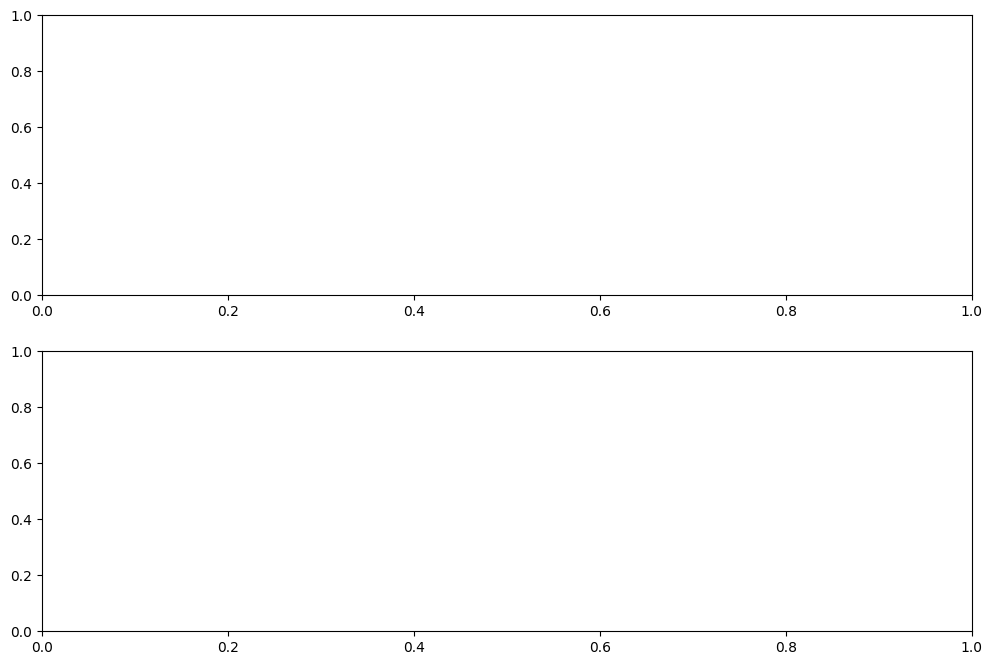

In [94]:
# Plot the autocorrelation and partial autocorrelation functions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
lags = min(40, len(df['Seasonal First Difference']) - 1)  # Adjusted lags to avoid shape mismatch
sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:], lags=lags, ax=ax1)  # Adjusted the starting index
sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:], lags=lags, ax=ax2)  # Adjusted the starting index

plt.show()

Shuts off Pacf zero hogaya after point 1 we will have shut down so the 1 is Ar value i.e p=1 #iske bad s shutdown huwa h

MA : direct shut down n hoga exponensial decrease hoga but yeh case m n dikhra to we will consider 0 and 1 check which is giving better result

i.e q= 0, 1

Seasonal diffrencing 1 hi bar kiye

df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

so d=1


In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# d=1 isliye coz we took 1 shift
from statsmodels.tsa.arima.model import ARIMA


Arima can be implemented on non-seasonal data

1,1,1 is p d q

In [ ]:
# Fit an ARIMA model
order = (1, 1, 1)  # Replace this with the appropriate order for your model
model = ARIMA(df['Sales'], order=order)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

####We are getting GAnda FOrecasting Ignore

###We have Seasonal Arimaxs

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #12 is shifted value
results=model.fit()

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True) #index 90 s end index tk
df[['Sales','forecast']].plot(figsize=(12,8))

This is on the given data but for new data how the forecast will look lets check in next step

df.index[-1]:

df.index refers to the index (dates) of your DataFrame df.
df.index[-1] gets the last date in your DataFrame.
DateOffset(months=x):

This creates a DateOffset object with a specified number of months.
The range(0, 24) generates a range of numbers from 0 to 23 (24 months).
df.index[-1] + DateOffset(months=x):

For each value of x in the range, it adds a DateOffset of x months to the last date in your DataFrame.
This creates a list of future dates starting from the date of the last observation in your DataFrame and extending for the next 24 months.
future_dates:

The result is a list of future dates, where each date is obtained by adding a specific number of months to the last date in your DataFrame.

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
len(future_dates)

In [ ]:
future_dates

pd.DataFrame():

This creates a new empty DataFrame.
index=future_dates[1:]:

The index parameter is set to the list of future dates, excluding the first date (future_dates[1:]).
The index represents the row labels of the DataFrame.
columns=df.columns:

The columns parameter is set to the columns of the original DataFrame df.
This ensures that the new DataFrame has the same columns as the original DataFrame.
future_datest_df:

This assigns the newly created DataFrame to the variable future_datest_df

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.head()

In [ ]:
future_datest_df.tail()

In [ ]:
future_df=pd.concat([df,future_datest_df])

In [ ]:
len(future_df)

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 128, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [ ]:
# Assuming 'forecast' is the column name where you stored the predictions
forecasted_data = future_df[['Sales', 'forecast']]

# Print or display the DataFrame with the original sales and forecasted values
print(forecasted_data)


In [ ]:
forecasted_data.to_csv('forecasted_data.csv', index=True)
